# Bitcoin Block Time Data Analysis 
### by Tim Guo

In [1]:
import pandas as pd
from datetime import timedelta
from bitcoin_block_data_collection_multi_thread import Get_Current_dir
from matplotlib import pyplot as plt
import numpy as np

In [2]:
dir=Get_Current_dir()
df=pd.read_csv(dir+'/data/data_preprocessing_copy.csv')
df.sort_values(by=['height'], inplace=True)
df.drop_duplicates(subset=['height'], inplace=True)
df.reset_index(inplace=True, drop=True)
df = df[['height','time']]
print(df.head(1000))

     height             time
0         0   1/3/2009 10:15
1         1   1/8/2009 18:54
2         2   1/8/2009 18:55
3         3   1/8/2009 19:02
4         4   1/8/2009 19:16
5         5   1/8/2009 19:23
6         6   1/8/2009 19:29
7         7   1/8/2009 19:39
8         8   1/8/2009 19:45
9         9   1/8/2009 19:54
10       10   1/8/2009 20:05
11       11   1/8/2009 20:12
12       12   1/8/2009 20:21
13       13   1/8/2009 20:23
14       14   1/8/2009 20:33
15       15   1/9/2009 20:45
16       16   1/9/2009 20:45
17       17   1/9/2009 21:03
18       18   1/9/2009 21:12
19       19   1/9/2009 21:22
20       20   1/9/2009 21:39
21       21   1/9/2009 21:49
22       22   1/9/2009 22:04
23       23   1/9/2009 22:06
24       24   1/9/2009 22:17
25       25   1/9/2009 22:24
26       26   1/9/2009 22:54
27       27   1/9/2009 22:56
28       28   1/10/2009 7:30
29       29   1/10/2009 7:31
30       30   1/10/2009 7:42
31       31   1/10/2009 7:52
32       32   1/10/2009 7:59
33       33   

In [3]:
# ====calculate time between two consecutive blocks
df['time']=pd.to_datetime(df['time'])
df['time_between_two_consecutive_blocks'] =(df['time'].shift(-1).copy()-df['time'].copy()).shift(1)
print(df.head(500))

     height                time time_between_two_consecutive_blocks
0         0 2009-01-03 10:15:00                                 NaT
1         1 2009-01-08 18:54:00                     5 days 08:39:00
2         2 2009-01-08 18:55:00                     0 days 00:01:00
3         3 2009-01-08 19:02:00                     0 days 00:07:00
4         4 2009-01-08 19:16:00                     0 days 00:14:00
5         5 2009-01-08 19:23:00                     0 days 00:07:00
6         6 2009-01-08 19:29:00                     0 days 00:06:00
7         7 2009-01-08 19:39:00                     0 days 00:10:00
8         8 2009-01-08 19:45:00                     0 days 00:06:00
9         9 2009-01-08 19:54:00                     0 days 00:09:00
10       10 2009-01-08 20:05:00                     0 days 00:11:00
11       11 2009-01-08 20:12:00                     0 days 00:07:00
12       12 2009-01-08 20:21:00                     0 days 00:09:00
13       13 2009-01-08 20:23:00                 

In [4]:
# ====find two consecutive blocks mined more than 2 hours and mark the time
#     note: we always mark the later block which is the block mined more than 2 hours from the former block
condition = df['time_between_two_consecutive_blocks']>=timedelta(hours=2)
df.loc[condition,'time_marked']=df['time']
print(df)

        height                time time_between_two_consecutive_blocks         time_marked
0            0 2009-01-03 10:15:00                                 NaT                 NaT
1            1 2009-01-08 18:54:00                     5 days 08:39:00 2009-01-08 18:54:00
2            2 2009-01-08 18:55:00                     0 days 00:01:00                 NaT
3            3 2009-01-08 19:02:00                     0 days 00:07:00                 NaT
4            4 2009-01-08 19:16:00                     0 days 00:14:00                 NaT
...        ...                 ...                                 ...                 ...
720003  720003 2022-01-22 22:43:00                     0 days 00:09:00                 NaT
720004  720004 2022-01-22 22:47:00                     0 days 00:04:00                 NaT
720005  720005 2022-01-22 23:24:00                     0 days 00:37:00                 NaT
720006  720006 2022-01-22 23:25:00                     0 days 00:01:00                 NaT

In [5]:
# ====count the number of the incident(two consecutive blocks mined more than 2 hours) happens
incident_happen_times = df['time_marked'].count()
print('incident_happen_times',incident_happen_times)

incident_happen_times 390


In [6]:
# ====get rid of other data since we only care about incidents
incident_collection=df[df['time_marked'].notnull()][['height','time_marked']]
print(incident_collection.head(500))

        height         time_marked
1            1 2009-01-08 18:54:00
15          15 2009-01-09 20:45:00
28          28 2009-01-10 07:30:00
79          79 2009-01-10 19:46:00
163        163 2009-01-11 15:01:00
169        169 2009-01-11 19:22:00
1296      1296 2009-01-21 16:05:00
1389      1389 2009-01-22 19:49:00
1390      1390 2009-01-22 23:33:00
1398      1398 2009-01-23 06:41:00
1916      1916 2009-01-26 01:03:00
1917      1917 2009-01-26 04:19:00
3097      3097 2009-02-05 03:04:00
7901      7901 2009-03-18 09:02:00
8211      8211 2009-03-21 01:16:00
8226      8226 2009-03-21 10:46:00
8231      8231 2009-03-21 17:54:00
8757      8757 2009-03-26 04:18:00
11964    11964 2009-04-23 03:27:00
11966    11966 2009-04-23 07:14:00
12900    12900 2009-05-01 07:27:00
13082    13082 2009-05-02 19:52:00
13781    13781 2009-05-08 08:04:00
13889    13889 2009-05-09 16:06:00
13898    13898 2009-05-10 01:42:00
14300    14300 2009-05-13 09:19:00
15048    15048 2009-05-19 13:57:00
15222    15222 2009-

In [7]:
# ====calculate the time interval between every two incidents i.e. how long would it take for one incident
# to happen before the previous incident
incident_collection['time_between_each_incident']=(incident_collection['time_marked'].shift(-1)-incident_collection['time_marked']).shift(1)
print(incident_collection)

        height         time_marked time_between_each_incident
1            1 2009-01-08 18:54:00                        NaT
15          15 2009-01-09 20:45:00            1 days 01:51:00
28          28 2009-01-10 07:30:00            0 days 10:45:00
79          79 2009-01-10 19:46:00            0 days 12:16:00
163        163 2009-01-11 15:01:00            0 days 19:15:00
169        169 2009-01-11 19:22:00            0 days 04:21:00
1296      1296 2009-01-21 16:05:00            9 days 20:43:00
1389      1389 2009-01-22 19:49:00            1 days 03:44:00
1390      1390 2009-01-22 23:33:00            0 days 03:44:00
1398      1398 2009-01-23 06:41:00            0 days 07:08:00
1916      1916 2009-01-26 01:03:00            2 days 18:22:00
1917      1917 2009-01-26 04:19:00            0 days 03:16:00
3097      3097 2009-02-05 03:04:00            9 days 22:45:00
7901      7901 2009-03-18 09:02:00           41 days 05:58:00
8211      8211 2009-03-21 01:16:00            2 days 16:14:00
8226    

In [8]:
# ====calculate the average time that the incident(two consecutive blocks mined more than 2 hours) occurs
average_time_incident_occurs = incident_collection['time_between_each_incident'].sum()/incident_collection['time_between_each_incident'].count()

print('average_time_incident_occurs',(average_time_incident_occurs))
print('average time in hours:',int(average_time_incident_occurs)/(1e9*3600))
print('average time in days:',int(average_time_incident_occurs)/(1e9*3600*24))

average_time_incident_occurs 1038823341902313 nanoseconds
average time in hours: 288.56203941730917
average time in days: 12.023418309054549


In [9]:
df['timestamp']=((df['time'])-pd.Timestamp("1970-01-01"))//pd.Timedelta('1s')
df['interval']=(df['timestamp'].shift(-1).copy()-df['timestamp'].copy()).shift(1)

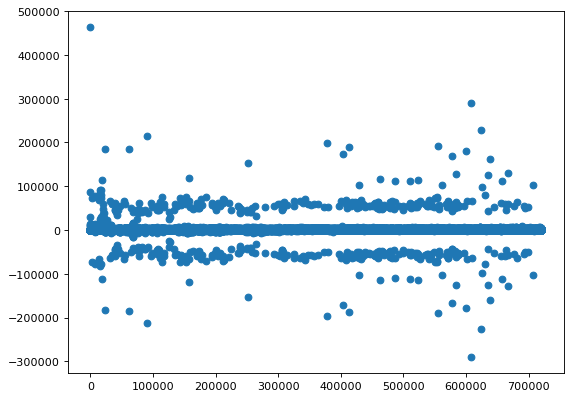

In [10]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
plt.scatter(df['height'],df['interval'])
plt.show()